In [1]:
import numpy as np

from plot_utils import read_Noise2Seg_results, fraction_to_abs, cm2inch, read_Noise2Seg_bestAlpha_results, read_voidseg_results

from matplotlib import pyplot as plt
plt.rc('text', usetex=True)

# DSB2018: AP scores 

In [2]:
baseline_dsb_n0_AP = read_Noise2Seg_results('fin', 'dsb_n0', measure='AP', runs=[1,2,3,4,5], 
                           fractions=[0.25, 0.5, 1.0, 2.0, 4.0, 8.0, 16.0, 32.0, 64.0, 100.0], score_type = '')
baseline_dsb_n10_AP = read_Noise2Seg_results('fin', 'dsb_n10', measure='AP', runs=[1,2,3,4,5], 
                           fractions=[0.25, 0.5, 1.0, 2.0, 4.0, 8.0, 16.0, 32.0, 64.0, 100.0], score_type = '')
baseline_dsb_n20_AP = read_Noise2Seg_results('fin', 'dsb_n20', measure='AP', runs=[1,2,3,4,5], 
                           fractions=[0.25, 0.5, 1.0, 2.0, 4.0, 8.0, 16.0, 32.0, 64.0, 100.0], score_type = '')

In [3]:
vanilla_baseline_dsb_n0_AP = read_voidseg_results('DSB_n0_AP_baseline.txt')
vanilla_baseline_dsb_n10_AP = read_voidseg_results('DSB_n10_AP_baseline.txt')
vanilla_baseline_dsb_n20_AP = read_voidseg_results('DSB_n20_AP_baseline.txt')

# DSB2018: SEG scores 

In [4]:
baseline_dsb_n0_SEG = read_Noise2Seg_results('fin', 'dsb_n0', measure='SEG', runs=[1,2,3,4,5], 
                           fractions=[0.25, 0.5, 1.0, 2.0, 4.0, 8.0, 16.0, 32.0, 64.0, 100.0], score_type = '')
baseline_dsb_n10_SEG = read_Noise2Seg_results('fin', 'dsb_n10', measure='SEG', runs=[1,2,3,4,5], 
                           fractions=[0.25, 0.5, 1.0, 2.0, 4.0, 8.0, 16.0, 32.0, 64.0, 100.0], score_type = '')
baseline_dsb_n20_SEG = read_Noise2Seg_results('fin', 'dsb_n20', measure='SEG', runs=[1,2,3,4,5], 
                           fractions=[0.25, 0.5, 1.0, 2.0, 4.0, 8.0, 16.0, 32.0, 64.0, 100.0], score_type = '')

In [5]:
vanilla_baseline_dsb_n0_SEG = read_voidseg_results('DSB_n0_SEG_baseline.txt')
vanilla_baseline_dsb_n10_SEG = read_voidseg_results('DSB_n10_SEG_baseline.txt')
vanilla_baseline_dsb_n20_SEG = read_voidseg_results('DSB_n20_SEG_baseline.txt')

In [6]:
plt.rc('font', family = 'serif', size = 16)

In [7]:
def plot_baselines(baseline, vanilla_baseline, title, xlimit, measure, max_imgs=3800):
    plt.plot(fraction_to_abs(baseline[:, 0], max_num_imgs = max_imgs), 
         baseline[:, 1],
         color = '#6D3B2B', alpha = 1, label = r'DenoiSeg baseline', linewidth=2)
    plt.fill_between(fraction_to_abs(baseline[:, 0], max_num_imgs = max_imgs), 
                     y1 = baseline[:, 1] + baseline[:, 2], 
                     y2 = baseline[:, 1] - baseline[:, 2], 
                     color = '#6D3B2B', alpha = 0.25)
    plt.plot(fraction_to_abs(baseline[:, 0], max_num_imgs = max_imgs), 
         vanilla_baseline[:, 1],
         color = '#FF6495ED', alpha = 1.0, label = r'Vanilla U-Net baseline', linewidth=2)
    plt.fill_between(fraction_to_abs(baseline[:, 0], max_num_imgs = max_imgs), 
                     y1 = vanilla_baseline[:, 1] + vanilla_baseline[:, 2], 
                     y2 = vanilla_baseline[:, 1] - vanilla_baseline[:, 2], 
                     color = '#FF6495ED', alpha = 0.25)
    
    plt.semilogx()
    
    if(measure == 'AP'):
        plt.ylabel(r'\textbf{AP}')
    elif(measure == 'SEG'):
        plt.ylabel(r'\textbf{SEG}')
        
    plt.grid(axis='y')

    plt.xticks(ticks=fraction_to_abs(baseline[:, 0], max_num_imgs = max_imgs), 
               labels=fraction_to_abs(baseline[:, 0], max_num_imgs = max_imgs).astype(np.int),
               rotation=45)
    plt.minorticks_off()

    plt.yticks(rotation=45)

    if xlimit:
        plt.xlim(xlimit)

    plt.title(title)

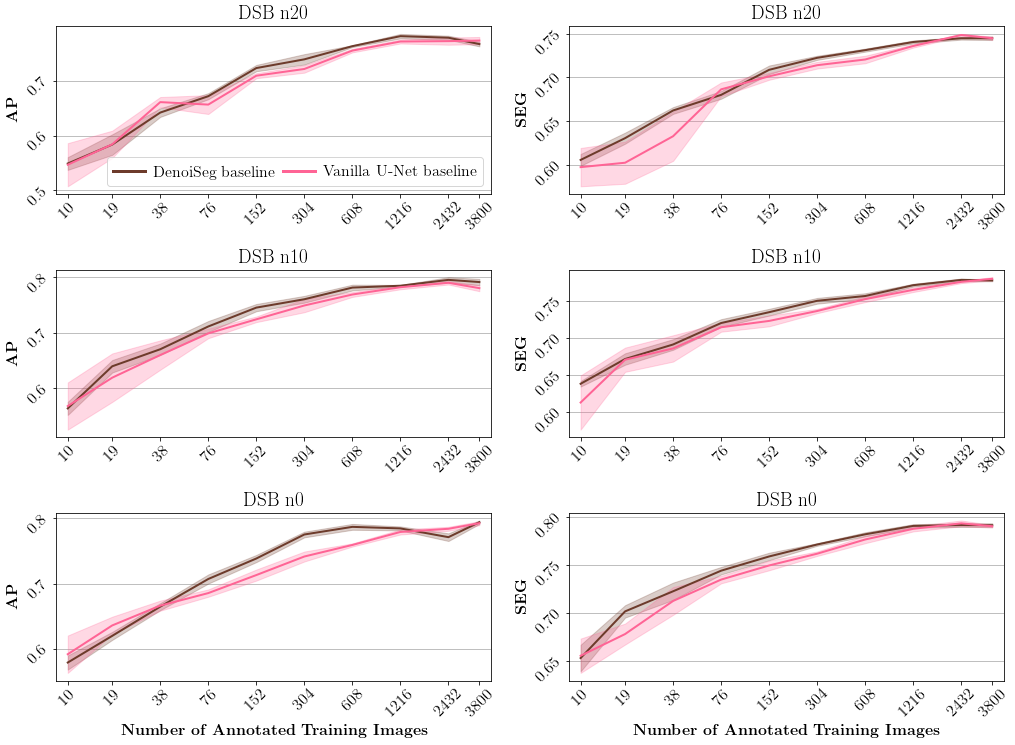

In [8]:
fig = plt.figure(figsize=cm2inch(12.2,9)) # 12.2cm is the text-widht of the MICCAI template
plt.rcParams['axes.axisbelow'] = True

plt.subplot(3,2,1)
plot_baselines(baseline_dsb_n20_AP, vanilla_baseline_dsb_n20_AP, 'DSB n20', xlimit = [8.5, 4500], measure = 'AP', max_imgs=3800)
leg = plt.legend(loc = 'lower right', ncol=2, labelspacing=0.1, handletextpad=0.5, columnspacing=0.5)
for legobj in leg.legendHandles:
    legobj.set_linewidth(3.0)


plt.subplot(3,2,3)
plot_baselines(baseline_dsb_n10_AP, vanilla_baseline_dsb_n10_AP, 'DSB n10', xlimit = [8.5, 4500], measure = 'AP', max_imgs=3800)

plt.subplot(3,2,5)
plot_baselines(baseline_dsb_n0_AP, vanilla_baseline_dsb_n0_AP, 'DSB n0', xlimit = [8.5, 4500], measure = 'AP', max_imgs=3800)
plt.xlabel(r'\textbf{Number of Annotated Training Images}')

plt.subplot(3,2,2)
plot_baselines(baseline_dsb_n20_SEG, vanilla_baseline_dsb_n20_SEG, 'DSB n20', xlimit = [8.5, 4500], measure = 'SEG', max_imgs=3800)

plt.subplot(3,2,4)
plot_baselines(baseline_dsb_n10_SEG, vanilla_baseline_dsb_n10_SEG, 'DSB n10', xlimit = [8.5, 4500], measure = 'SEG', max_imgs=3800)

plt.subplot(3,2,6)
plot_baselines(baseline_dsb_n0_SEG, vanilla_baseline_dsb_n0_SEG, 'DSB n0', xlimit = [8.5, 4500], measure = 'SEG', max_imgs=3800)
plt.xlabel(r'\textbf{Number of Annotated Training Images}')

plt.tight_layout();

plt.savefig('DSB_baseline_vs_vanillabaseline.pdf', pad_inches=0.0);
plt.savefig('DSB_baseline_vs_vanillabaseline.svg', pad_inches=0.0)